In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
import pcmdpy as ppy
from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord
%matplotlib inline

In [2]:
plt.style.use('cook')

In [3]:
from setup_files.m31_paper2.m31_models import models, run_names, results

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/Users/bcook/pCMDs/pixcmd/pcmdpy/pcmdpy/plotting/results.py:83: RuntimeWarning: invalid value encountered in sqrt
  logzerrs.append(np.sqrt(logzvar))


AssertionError: ['d2-m3', 'd3-m3', 'd6-m3', 'd7-m3', 'd8-m3', 'd9-m3', 'd10-m3', 'd2-m4', 'd3-m4', 'd6-m4', 'd7-m4', 'd8-m4', 'd9-m4', 'd10-m4']

In [ ]:
'w4-m3'
'w5-m3'
's2-m3'
's3-m3'
'w6-m3'
's4-m3'
's5-m3'
's6-m3'
's7-m3'
's4-m4'
's5-m4'

In [ ]:
models

In [11]:
ppy.__path__[0]

'/Users/bcook/pCMDs/pixcmd/pcmdpy/pcmdpy'

In [5]:
!ls ../results

ls: ../results: No such file or directory


In [ ]:
f = ppy.instrument.default_m31_filters()
iso_model = ppy.isochrones.Isochrone_Model(f, mag_system='ab')

In [5]:
summers = {
    1: 'Bulge Region 1',
    2: 'Disk Region 4',
    3: 'Disk Region 5',
    4: 'Disk Region 7',
    5: 'Disk Region 8',
    6: 'Disk Region 9',
    7: 'Disk Region 10 (Large)',
    8: 'Bulge Region 4',
    9: 'Bulge Region 5',
}
winters = {
    1: 'Bulge Region 2',
    2: 'Bulge Region 3',
    3: 'Disk Region 1',
    4: 'Disk Region 2',
    5: 'Disk Region 3',
    6: 'Disk Region 6',
    7: 'Bulge Region 6', 
    8: 'Bulge Region 7',
    9: 'Bulge Region 8',
    10: 'Bulge Region 9',
}
models = {
    1: 'Tau SFH (Distance Fixed)',
    2: 'Tau SFH (Distance Free)',
    3: 'LikeMode 3, Tau SFH (Distance Free)',
    4: 'NonParam SFH (Distance Free)',
}

In [6]:
reg_to_season = {
    'bulge_1': 's1',
    'bulge_2': 'w1',
    'bulge_3': 'w2',
    'bulge_4': 's8',
    'bulge_5': 's9', 
    'bulge_6': 'w7', 
    'bulge_7': 'w8',
    'bulge_8': 'w9',
    'bulge_9': 'w10',
    'disk_1': 'w3',
    'disk_2': 'w4',
    'disk_3': 'w5',
    'disk_4': 's2',
    'disk_5': 's3',
    'disk_6': 'w6',
    'disk_7': 's4',
    'disk_8': 's5',
    'disk_9': 's6',
    'disk_10': 's7'
}

season_to_reg ={v:k for k,v in reg_to_season.items()}

In [7]:
d_kpc = 7.66e2

In [8]:
coord_center = SkyCoord("0h42m44.341s", "+41d16m08.72s")
coords_disk = []
coords_disk.append(SkyCoord("0h44m14.282s", "+41d21m53.59s"))
coords_disk.append(SkyCoord("0h44m19.127s", "+41d24m02.26s"))
coords_disk.append(SkyCoord("0h44m32.039s", "+41d21m46.35s"))
coords_disk.append(SkyCoord("0h44m41.015s", "+41d20m41.62s"))
coords_disk.append(SkyCoord("0h44m46.214s", "+41d22m43.44s"))
coords_disk.append(SkyCoord("0h44m25.489s", "+41d19m32.61s"))
coords_disk.append(SkyCoord("0h44m53.254s", "+41d18m27.43s"))
coords_disk.append(SkyCoord("0h44m59.235s", "+41d20m40.15s"))
coords_disk.append(SkyCoord("0h44m56.598s", "+41d22m41.50s"))
coords_disk.append(SkyCoord("0h44m34.199s", "+41d20m31.13s"))

In [11]:
disk_arcmins = [coord_center.separation(c).arcmin for c in coords_disk]
disk_kpc = [coord_center.separation(c).radian*d_kpc for c in coords_disk]
disk_kpc

[3.9749564624919658,
 4.3371175044090835,
 4.677165757318312,
 4.986266421306942,
 5.304955444290684,
 4.300315623471545,
 5.420397784896863,
 5.733909347447372,
 5.7218833718538535,
 4.699231511933996]

In [12]:
bulge_pix = [6225., 2050., 1350., 6225., 6225., 3550., 3550., 3550., 705.,]
bulge_arcmins = [bp * 0.05 / 60. for bp in bulge_pix]
bulge_kpc = [am * (np.pi / (180.*60.)) * d_kpc for am in bulge_arcmins]
bulge_kpc

[1.155880658159328,
 0.3806514617231521,
 0.2506729138176856,
 1.155880658159328,
 1.155880658159328,
 0.6591769215205806,
 0.6591769215205806,
 0.6591769215205806,
 0.13090696610479136]

In [13]:
all_kpc = bulge_kpc + disk_kpc

In [14]:
res = {}
dynesty_weights = True
for i, desc in summers.items():
    for m, model in models.items():
        k = 'summer_model{:d}_r{:d}'.format(m, i)
        name = 'model{:d}_s{:d}'.format(m,i)
        try:
            res[name] = ppy.results.ResultsPlotter(
                'results/m31_'+k+'.csv', live_file='results/m31_'+k+'_live.csv',
                run_name=desc+'\n'+model, dynesty_weights=dynesty_weights)
        except FileNotFoundError:
            continue
        except ValueError:
            print(name)
            continue
            
for i, desc in winters.items():
    for m, model in models.items():
        k = 'winter_model{:d}_r{:d}'.format(m, i)
        name = 'model{:d}_w{:d}'.format(m,i)
        try:
            res[name] = ppy.results.ResultsPlotter(
                'results/m31_'+k+'.csv', live_file='results/m31_'+k+'_live.csv',
                run_name=desc+'\n'+model, dynesty_weights=dynesty_weights)
        except FileNotFoundError:
            continue
        except ValueError:
            print(name)
            continue
   

/n/home01/bcook/.local/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/n/home01/bcook/.local/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/n/home01/bcook/pixcmd/pcmdpy/pcmdpy/sampling/results.py:201: RuntimeWarning: invalid value encountered in sqrt
  logzerrs.append(np.sqrt(logzvar))


In [22]:
res['model1_s1'].metal_model

In [18]:
res['model1_s1'].r_kpc

5.0

In [20]:
a = 3
f'{a+3}'

'6'

In [47]:
bulge_regions = [reg_to_season[k] for k in ['bulge_1', 'bulge_4', 'bulge_5', 'bulge_6', 'bulge_7', 'bulge_8', 'bulge_2', 'bulge_3', 'bulge_9']]  # In decreasing radius
disk_regions = ['w3', 'w4', 'w5', 's2', 's3', 'w6', 's4', 's5', 's6', 's7']
all_regions = bulge_regions + disk_regions

In [48]:
bulge_regions

['s1', 's8', 's9', 'w7', 'w8', 'w9', 'w1', 'w2', 'w10']

In [49]:
for rp in res.values():
    rp.p_feh = rp.metal_model._num_params
    rp.p_dust = rp.dust_model._num_params
    rp.p_sfh = rp.sfh_model._num_params
    rp.p_distance = rp.distance_model._num_params
    rp.p_total = rp.p_feh + rp.p_dust + rp.p_sfh + rp.p_distance

In [51]:
res['model2_w10'].summary_stats.mean

array([ 0.19350345, -1.72217975,  3.68334665,  2.37541846, 24.23271987])

In [60]:
res['model2_s1'].params

['logfeh_mean', 'logdust', 'logNpix', 'tau', 'dmod']

In [61]:
res['model3_s1'].params

['logfeh_mean',
 'logdust',
 'logSFH0',
 'logSFH1',
 'logSFH2',
 'logSFH3',
 'logSFH4',
 'logNpix']

In [62]:
res['model4_s1'].params

['logfeh_mean',
 'logdust',
 'logSFH0',
 'logSFH1',
 'logSFH2',
 'logSFH3',
 'logSFH4',
 'dmod',
 'logNpix']

In [125]:
bulge_feh = {}
bulge_feherr = {}
disk_feh = {}
disk_feherr = {}
for m in ['model1', 'model2', 'model3', 'model4']:
    bulge_feh[m] = [res[m +'_'+ r].summary_stats.mean[0] for r in bulge_regions]
    bulge_feherr[m] = [res[m +'_'+ r].summary_stats.std[0] for r in bulge_regions]
for m in ['model1', 'model2']:
    disk_feh[m] = [res[m +'_'+ r].summary_stats.mean[0] for r in disk_regions]
    disk_feherr[m] = [res[m +'_'+ r].summary_stats.std[0] for r in disk_regions]

In [126]:
bulge_dust = {}
bulge_dusterr = {}
disk_dust = {}
disk_dusterr = {}
for m in ['model1', 'model2', 'model3', 'model4']:
    bulge_dust[m] = [res[m +'_'+ r].summary_stats.mean[1] for r in bulge_regions]
    bulge_dusterr[m] = [res[m +'_'+ r].summary_stats.std[1] for r in bulge_regions]
for m in ['model1', 'model2']:
    disk_dust[m] = [res[m +'_'+ r].summary_stats.mean[1] for r in disk_regions]
    disk_dusterr[m] = [res[m +'_'+ r].summary_stats.std[1] for r in disk_regions]

In [127]:
bulge_Npix = {}
bulge_Npixerr = {}
disk_Npix = {}
disk_Npixerr = {}
for m in ['model1', 'model2']:
    bulge_Npix[m] = [res[m +'_'+ r].summary_stats.mean[2] for r in bulge_regions]
    bulge_Npixerr[m] = [res[m +'_'+ r].summary_stats.std[2] for r in bulge_regions]
    disk_Npix[m] = [res[m +'_'+ r].summary_stats.mean[2] for r in disk_regions]
    disk_Npixerr[m] = [res[m +'_'+ r].summary_stats.std[2] for r in disk_regions]
for m in ['model3', 'model4']:
    bulge_Npix[m] = [res[m +'_'+ r].summary_stats.mean[-1] for r in bulge_regions]
    bulge_Npixerr[m] = [res[m +'_'+ r].summary_stats.std[-1] for r in bulge_regions]

In [128]:
bulge_tau = {}
bulge_tauerr = {}
disk_tau = {}
disk_tauerr = {}
for m in ['model1', 'model2']:
    bulge_tau[m] = [res[m +'_'+ r].summary_stats.mean[3] for r in bulge_regions]
    bulge_tauerr[m] = [res[m +'_'+ r].summary_stats.std[3] for r in bulge_regions]
    disk_tau[m] = [res[m +'_'+ r].summary_stats.mean[3] for r in disk_regions]
    disk_tauerr[m] = [res[m +'_'+ r].summary_stats.std[3] for r in disk_regions]

In [129]:
bulge_dist = {}
bulge_disterr = {}
disk_dist = {}
disk_disterr = {}
bulge_dist['model2'] = [res['model2' +'_'+ r].summary_stats.mean[-1] for r in bulge_regions]
bulge_disterr['model2'] = [res['model2' +'_'+ r].summary_stats.std[-1] for r in bulge_regions]
disk_dist['model2'] = [res['model2' +'_'+ r].summary_stats.mean[-1] for r in disk_regions]
disk_disterr['model2'] = [res['model2' +'_'+ r].summary_stats.std[-1] for r in disk_regions]
bulge_dist['model4'] = [res['model4' +'_'+ r].summary_stats.mean[-2] for r in bulge_regions]
bulge_disterr['model4'] = [res['model4' +'_'+ r].summary_stats.std[-2] for r in bulge_regions]

In [131]:
disk_regions

['w3', 'w4', 'w5', 's2', 's3', 'w6', 's4', 's5', 's6', 's7']

In [132]:
[res['model3_'+r].params for r in disk_regions]

[['logfeh_mean',
  'logdust',
  'logSFH0',
  'logSFH1',
  'logSFH2',
  'logSFH3',
  'logSFH4',
  'logNpix'],
 ['logfeh_mean', 'logdust', 'logNpix', 'tau', 'dmod'],
 ['logfeh_mean', 'logdust', 'logNpix', 'tau', 'dmod'],
 ['logfeh_mean',
  'logdust',
  'logSFH0',
  'logSFH1',
  'logSFH2',
  'logSFH3',
  'logSFH4',
  'logNpix'],
 ['logfeh_mean',
  'logdust',
  'logSFH0',
  'logSFH1',
  'logSFH2',
  'logSFH3',
  'logSFH4',
  'logNpix'],
 ['logfeh_mean', 'logdust', 'logNpix', 'tau', 'dmod'],
 ['logfeh_mean', 'logdust', 'logNpix', 'tau', 'dmod'],
 ['logfeh_mean', 'logdust', 'logNpix', 'tau', 'dmod'],
 ['logfeh_mean', 'logdust', 'logNpix', 'tau', 'dmod'],
 ['logfeh_mean', 'logdust', 'logNpix', 'tau', 'dmod']]

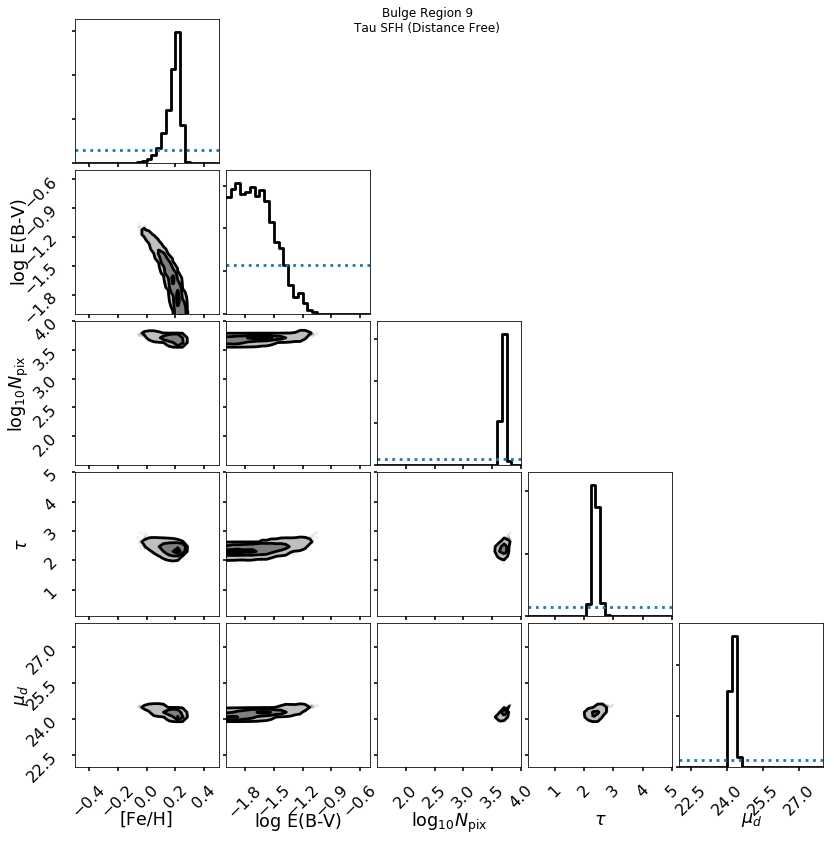

In [17]:
res['model2_w10'].plot_corner(weight=False, burn=15000);

In [25]:
ppy.distancemodels.dmod_to_mpc(24.42)

0.765596606911257

In [14]:
def plot_sets(models=[], regions=[], chains_only=False, dmod_true=24.42):
    max_params = {}
    all_keys = [m + '_' + r for r in regions for m in models]
    all_keys = np.array(all_keys)[np.in1d(all_keys, list(res.keys()))]
    for k in ['p_feh', 'p_dust', 'p_sfh', 'p_distance', 'p_total']:
        max_params[k] = np.max([res[key].__dict__[k] for key in all_keys])
    nr = 0 + max_params['p_total']
    if np.any([isinstance(res[key].sfh_model, ppy.sfhmodels.NonParam) for key in all_keys]):
        nr += 1  # for Npix
    if not chains_only:
        nr += 3
    nx = len(all_keys)
    fs = (5+3*nx, 2*nr)
    fig, axes = plt.subplots(ncols=nx, nrows=nr, figsize=fs, sharex=True, sharey='row')
    if nx == 1:
        axes = np.array([axes])
    for i, r in enumerate(all_keys):
        results = res[r]
        plot_axes = list(axes[:, i])
        ax_drop = []
        x = 0
        i_dist = None
        for k in ['p_feh', 'p_dust', 'p_sfh', 'p_distance']:
            d_param = max_params[k] - results.__dict__[k]
            for _ in range(d_param):
                ax_drop.append(plot_axes.pop(x + results.__dict__[k]))
                x -= 1
            x += max_params[k]
            if k == 'p_distance':
                if results.p_distance == 1:
                    plot_axes[x-1].axhline(y=dmod_true, ls='--', color='r', zorder=10)
        results.plot_chains(axes=plot_axes, chains_only=chains_only)
    plt.tight_layout()
    return fig, axes

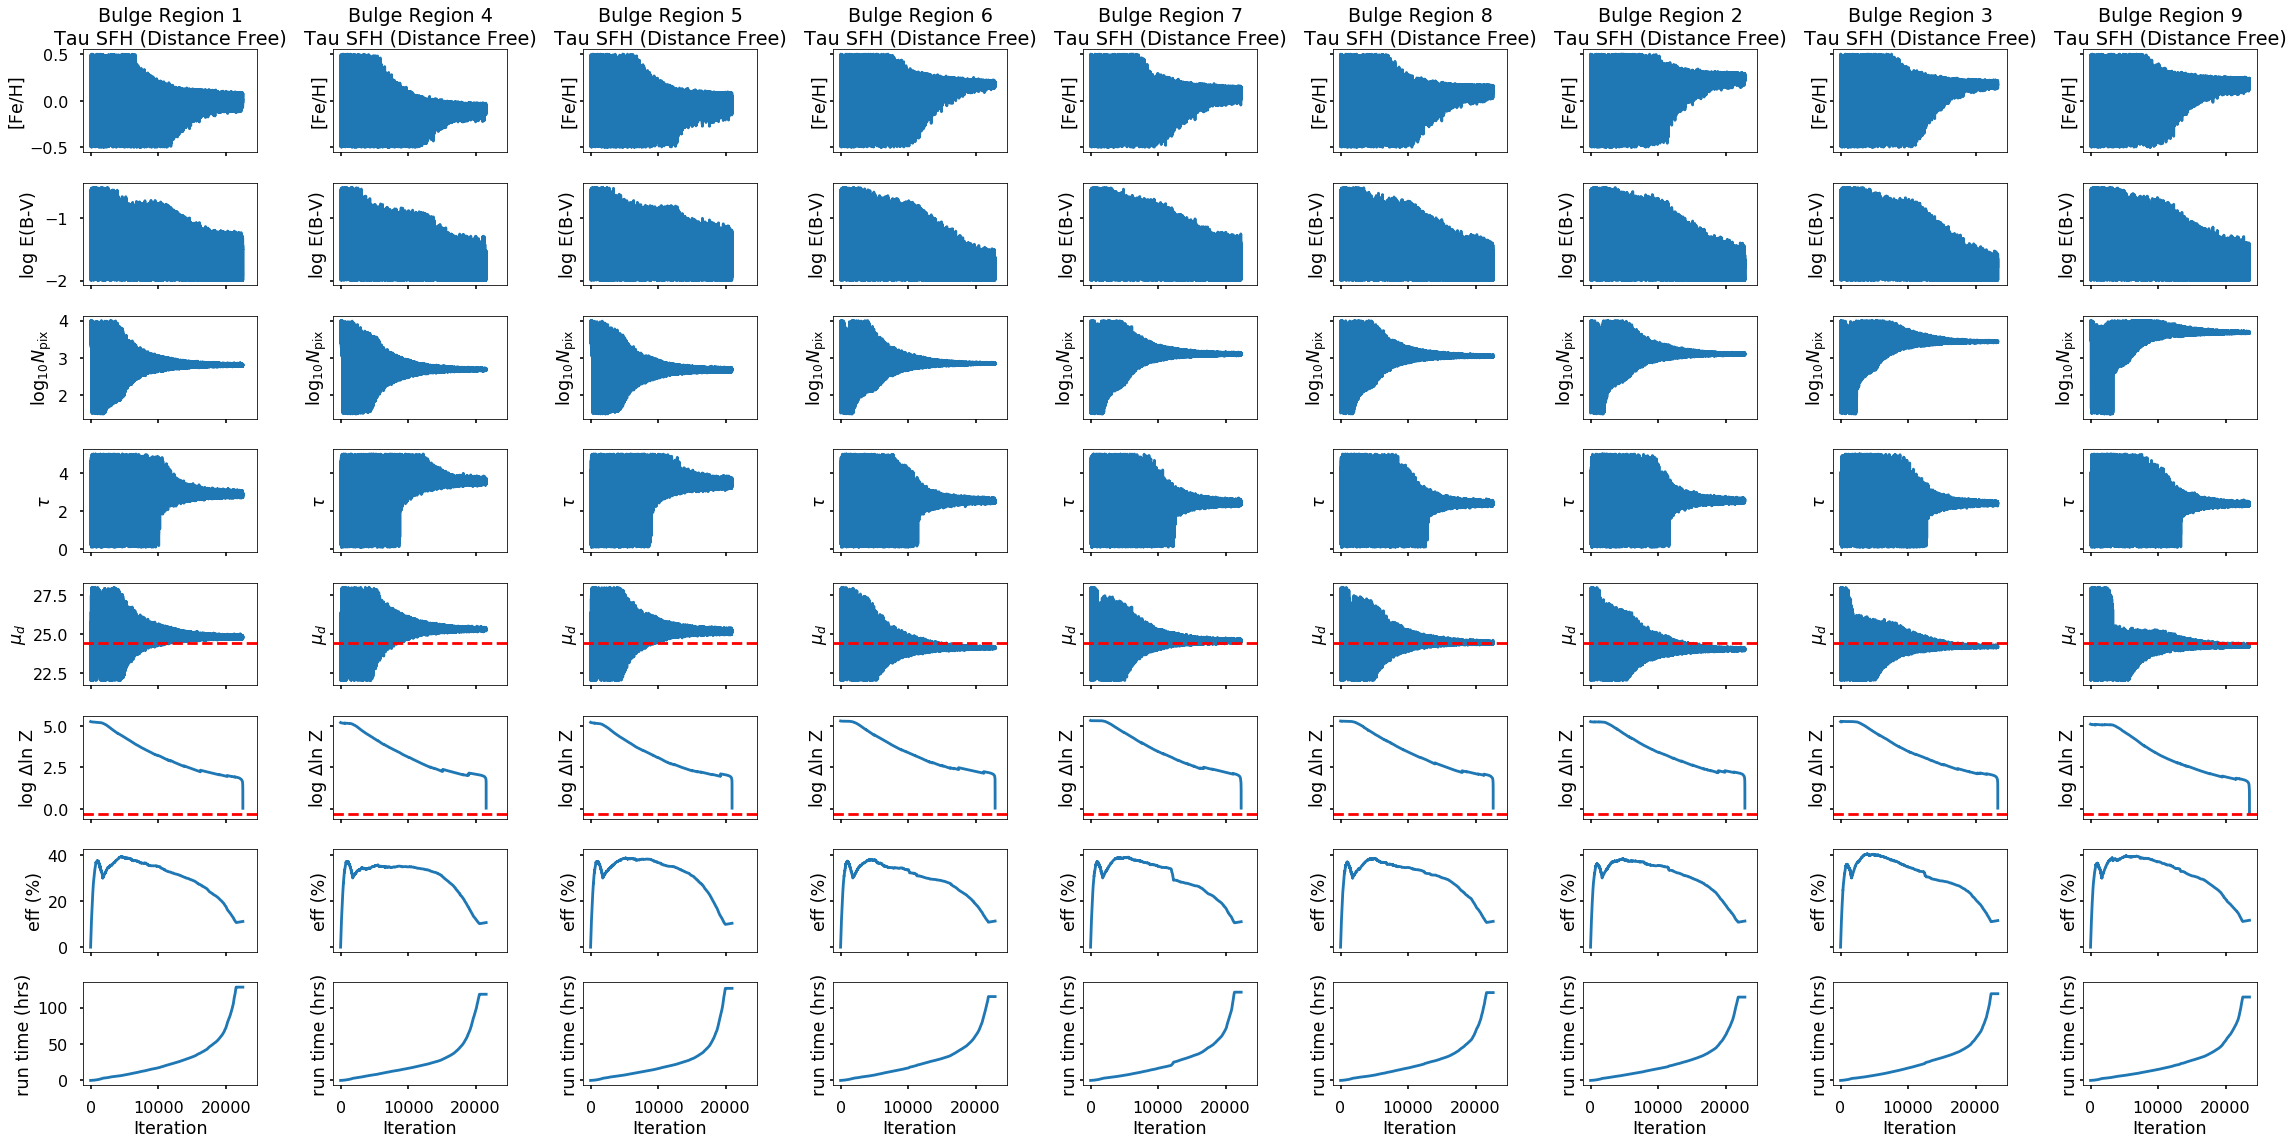

In [13]:
f, a = plot_sets(['model2'], regions=bulge_regions, chains_only=False);

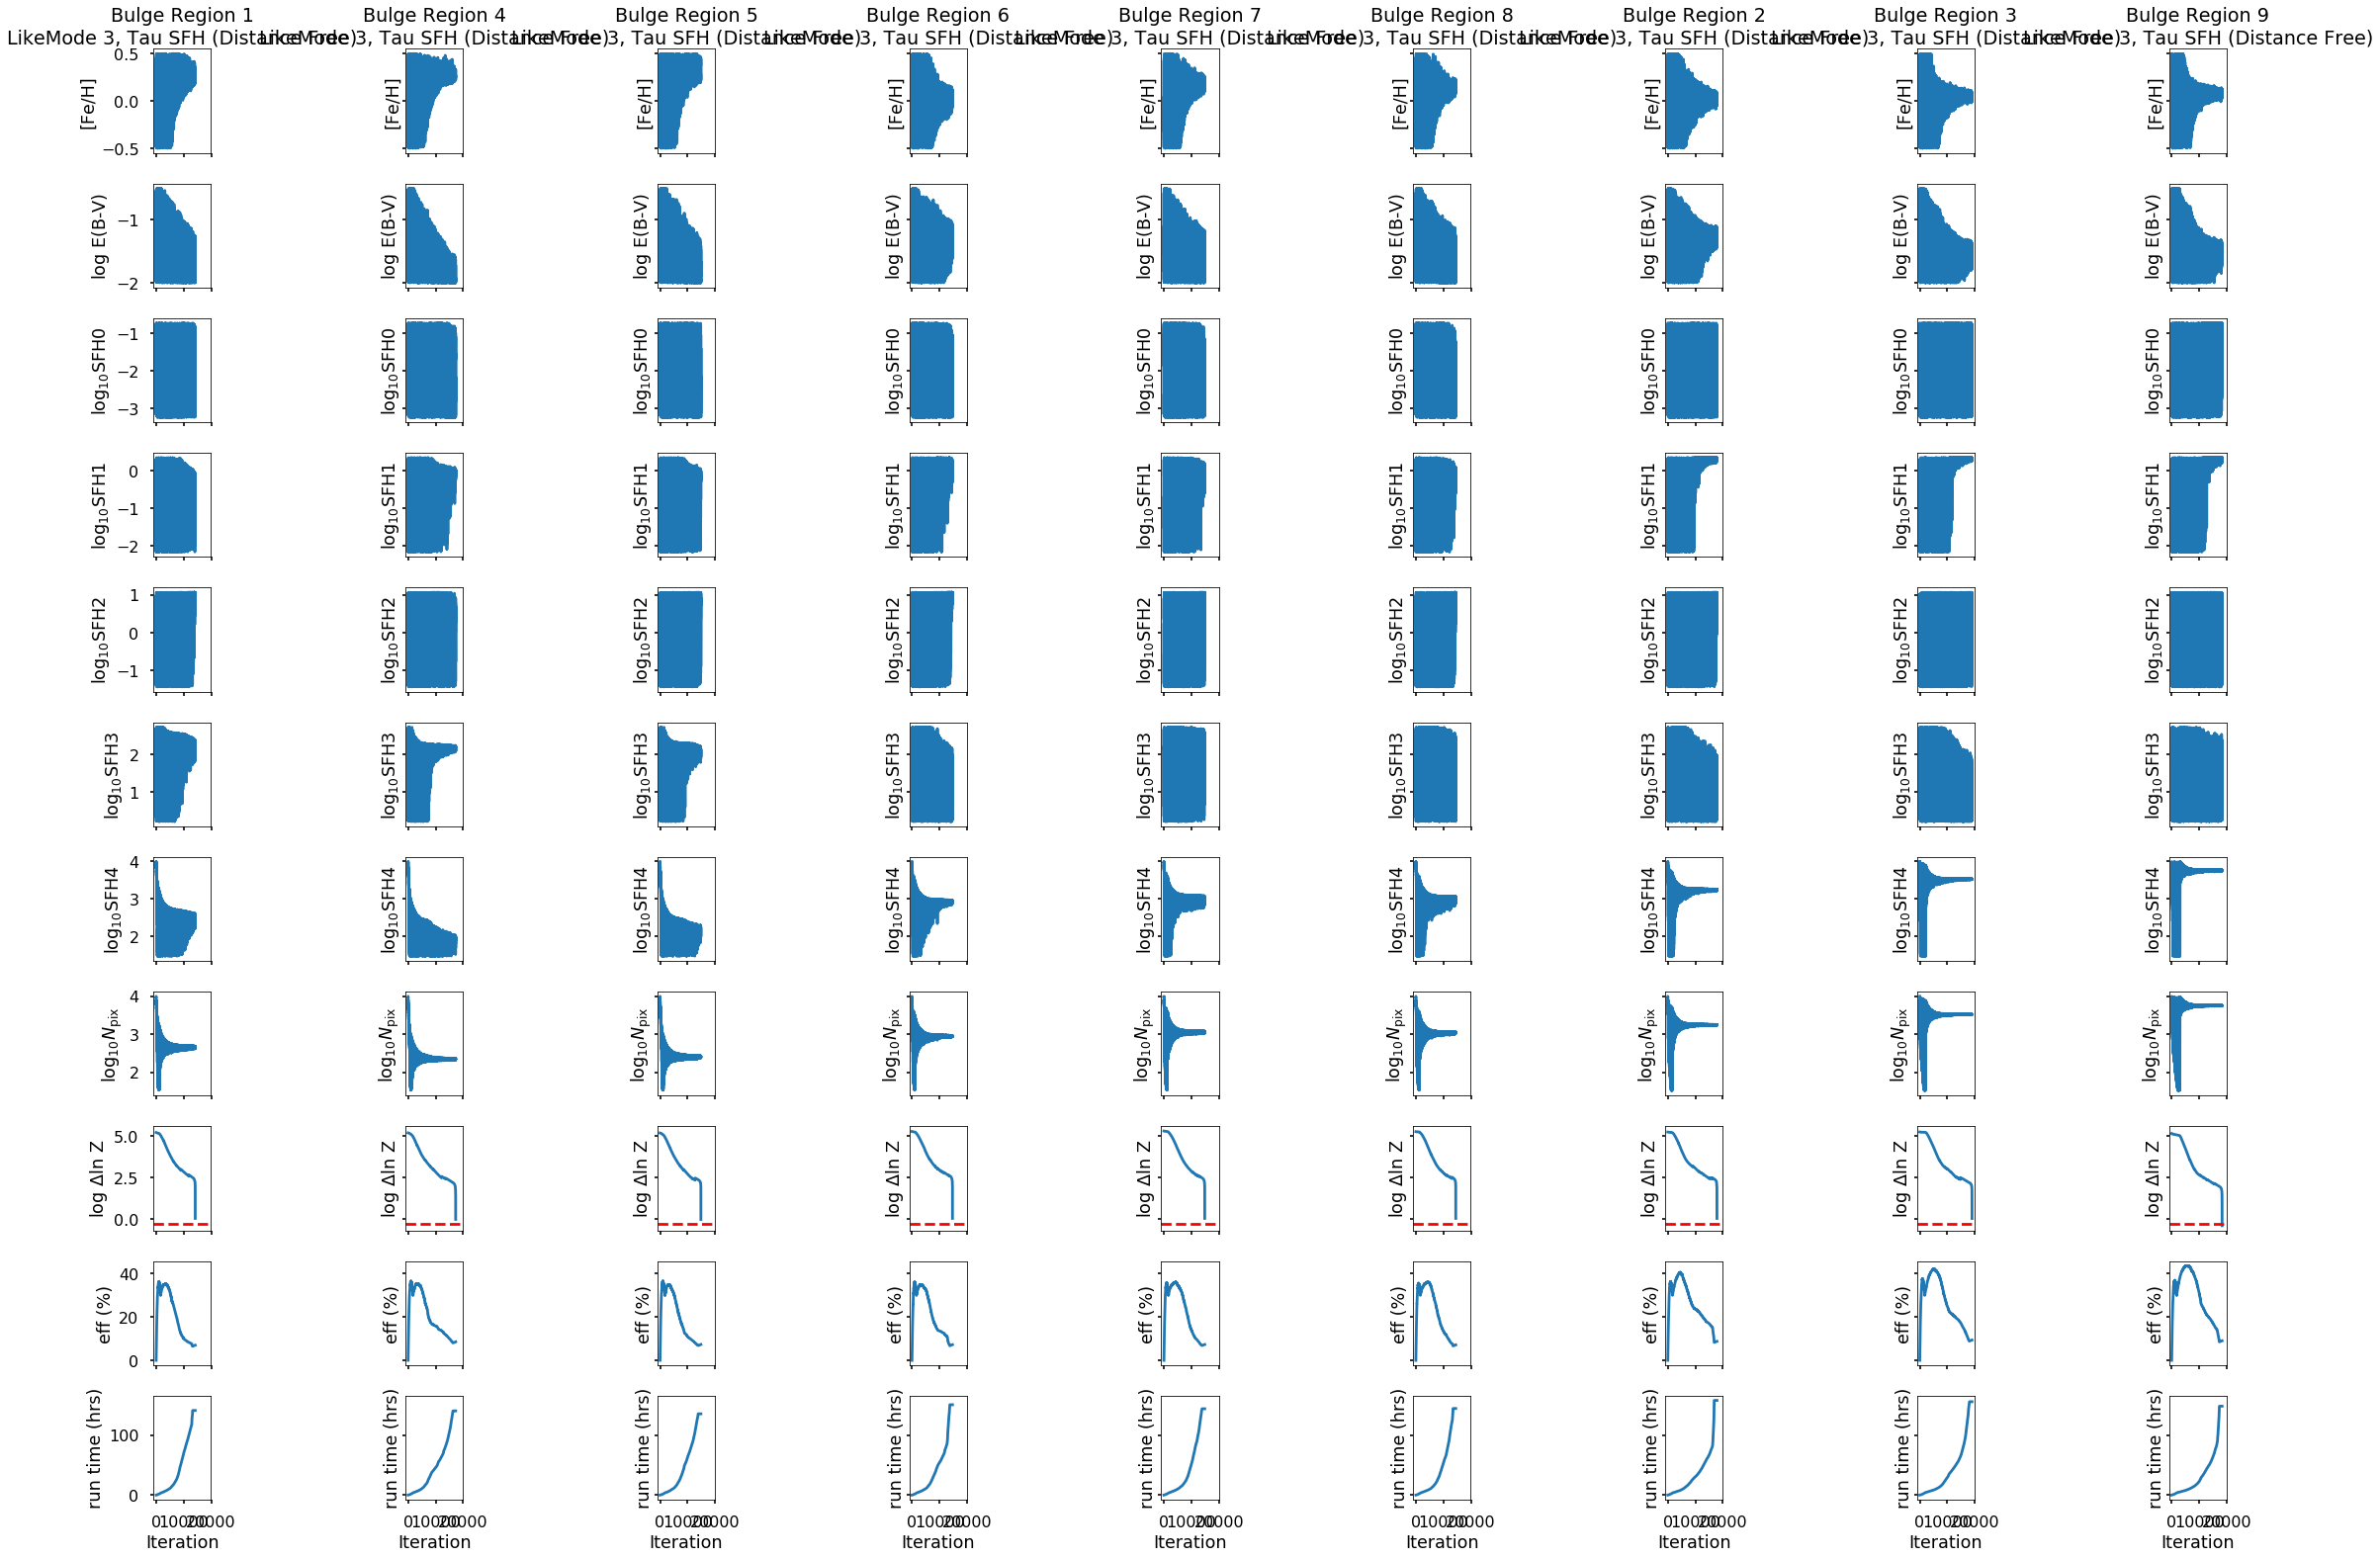

In [34]:
f, a = plot_sets(['model3'], regions=bulge_regions, chains_only=False);

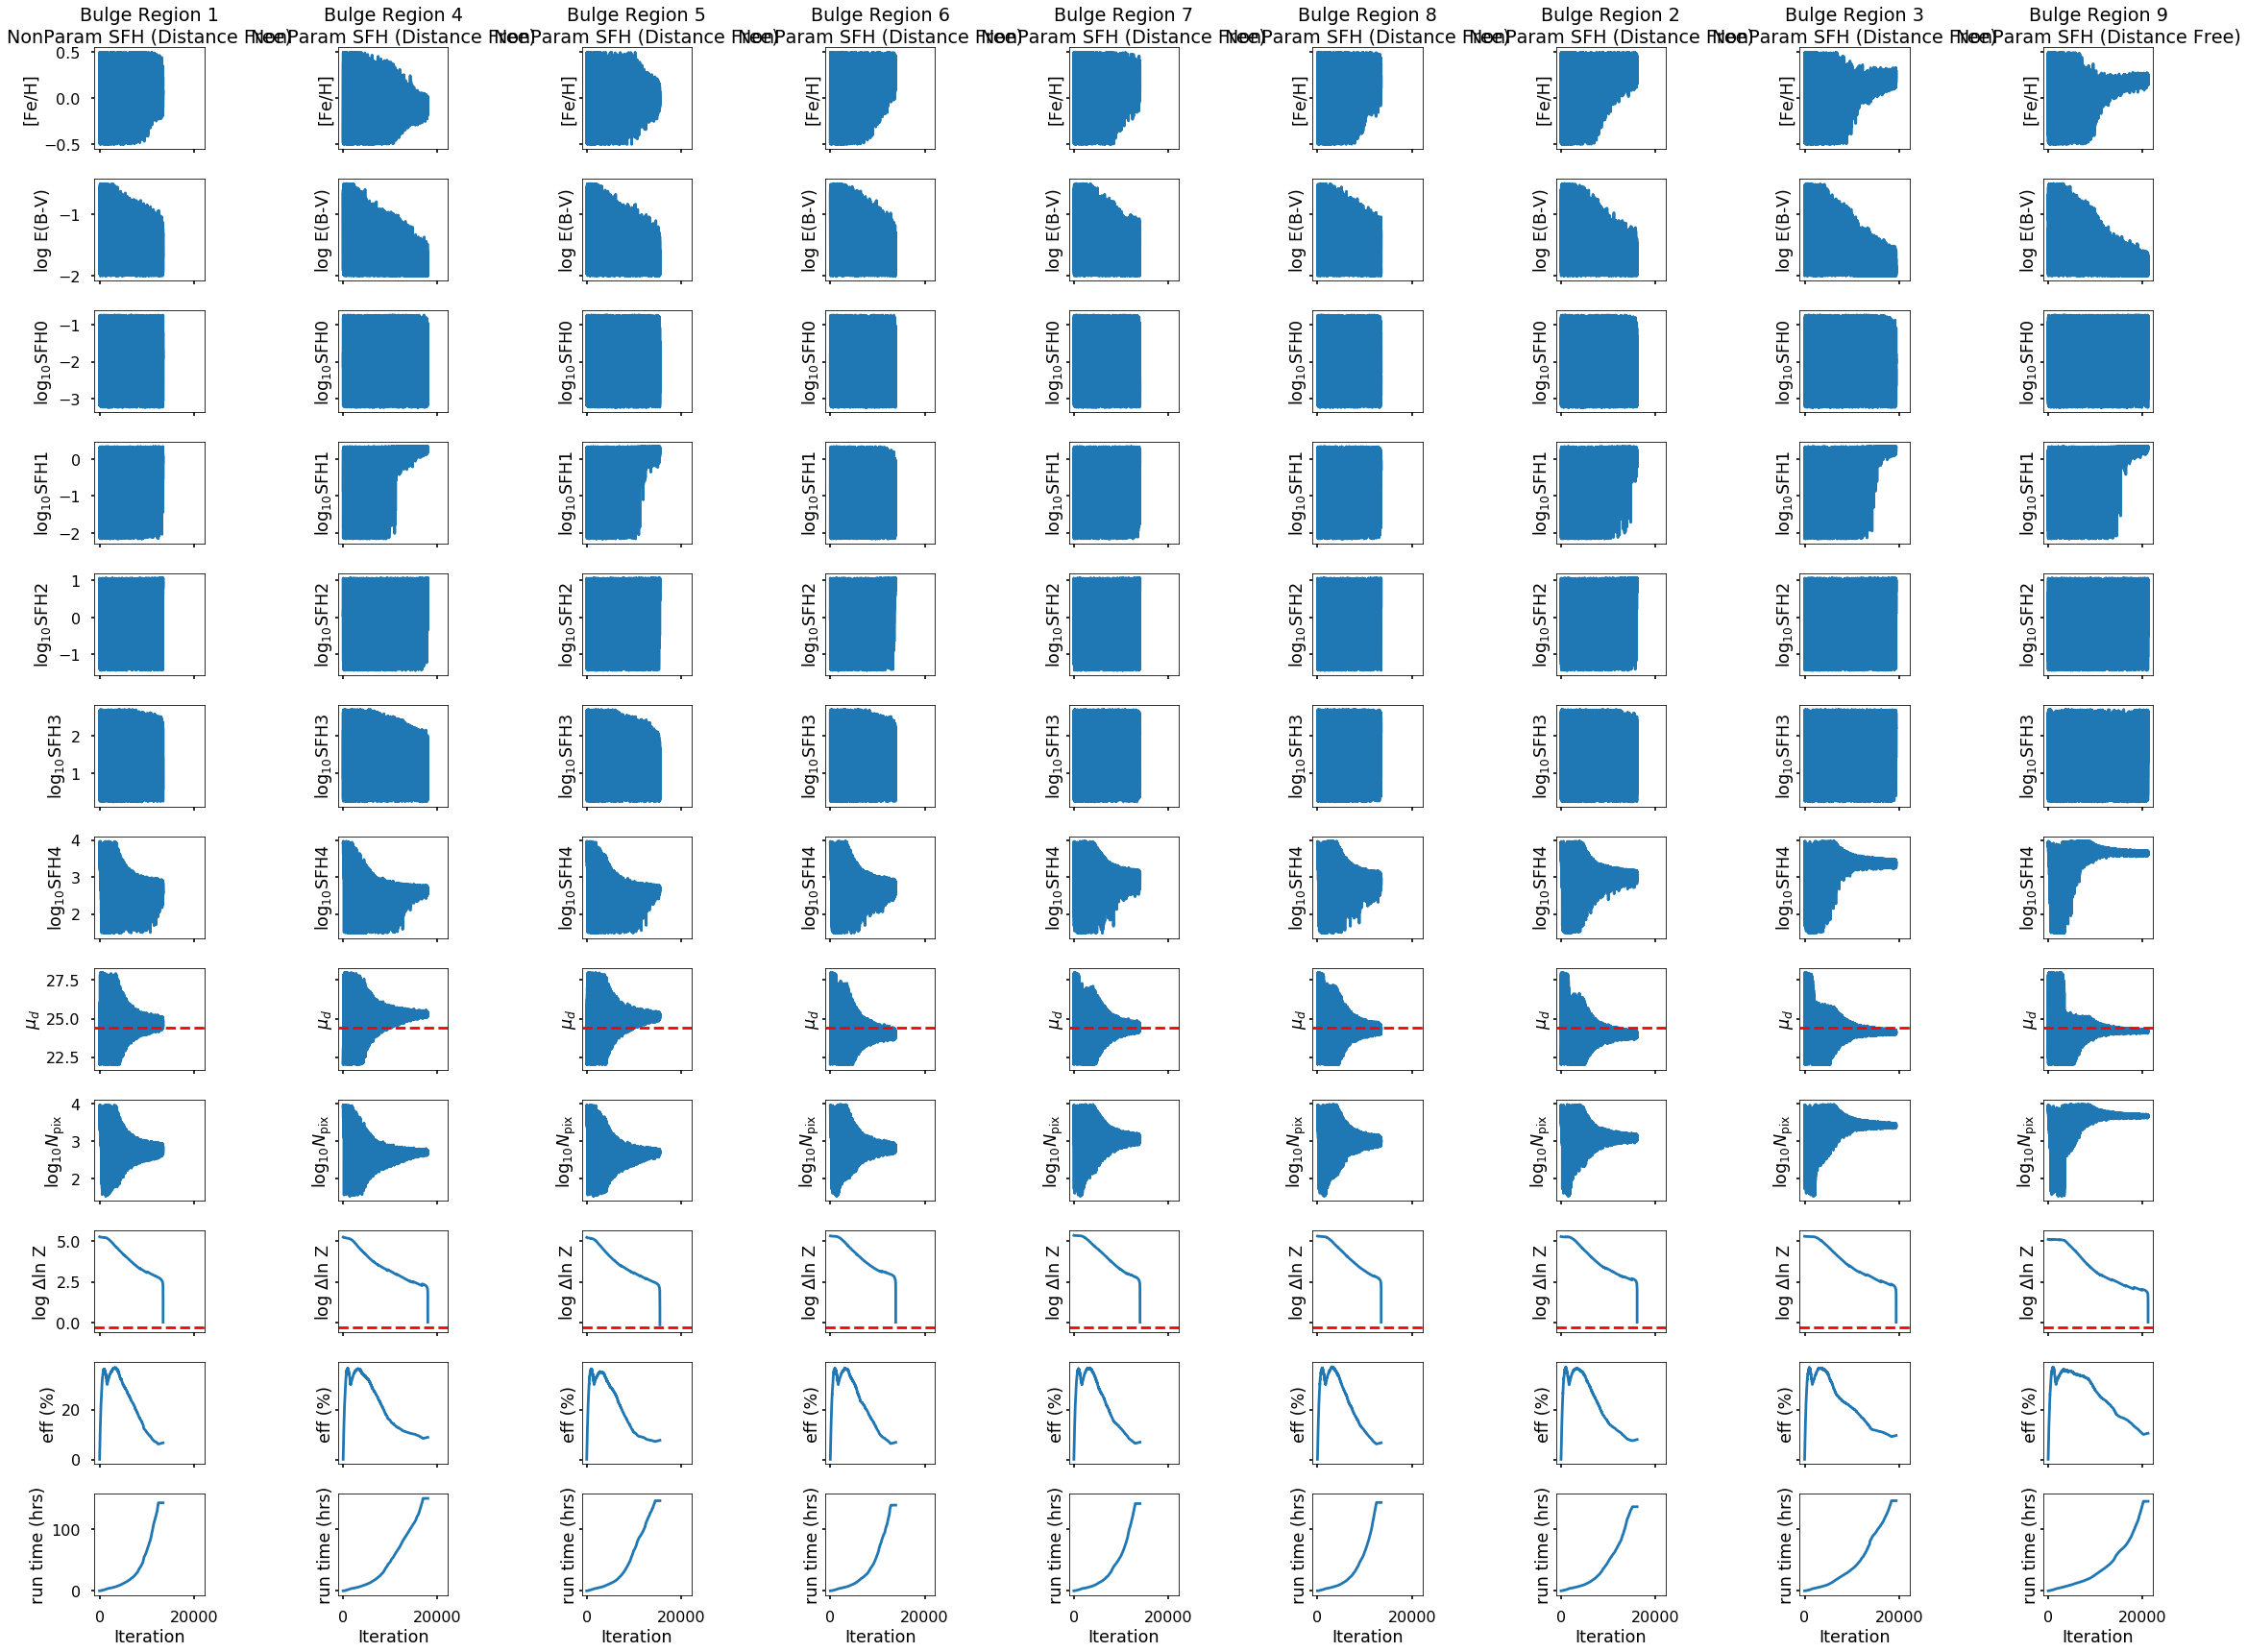

In [33]:
f, a = plot_sets(['model4'], regions=bulge_regions, chains_only=False);

In [78]:
bulge_dist['model2']

[24.802373157268583,
 25.327999999751924,
 25.169000000164914,
 24.073005676150252,
 24.57997010496558,
 24.395999998017682,
 23.995003976364732,
 24.18900029684316,
 24.232719871560256]

In [79]:
[k for k in res.keys() if 'model2' in k]

['model2_s1',
 'model2_s2',
 'model2_s3',
 'model2_s4',
 'model2_s5',
 'model2_s6',
 'model2_s7',
 'model2_s8',
 'model2_s9',
 'model2_w1',
 'model2_w2',
 'model2_w3',
 'model2_w4',
 'model2_w5',
 'model2_w6',
 'model2_w7',
 'model2_w8',
 'model2_w9',
 'model2_w10']

In [80]:
disk_regions

['w3', 'w4', 'w5', 's2', 's3', 'w6', 's4', 's5', 's6', 's7']

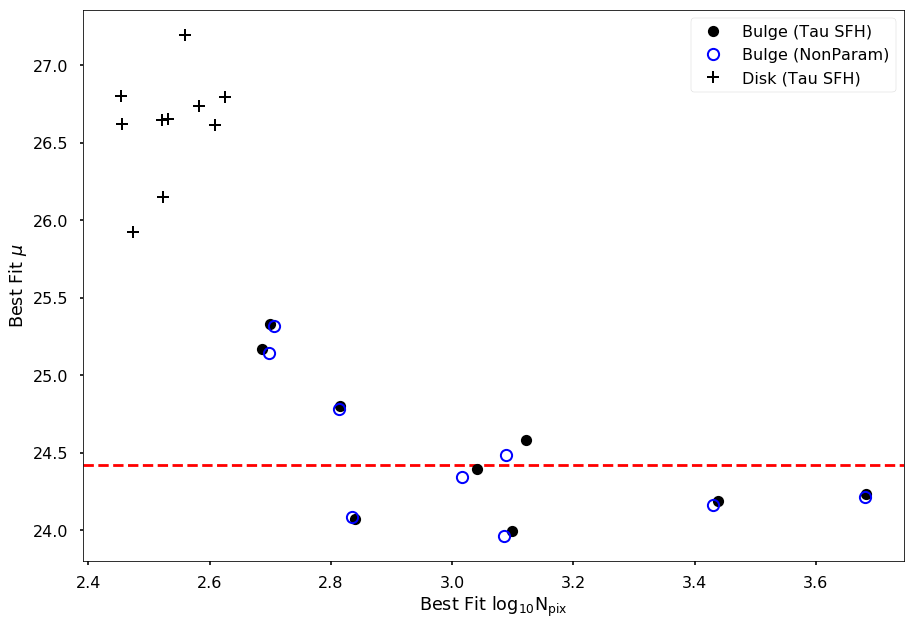

In [133]:
fig, ax = plt.subplots()
ax.plot(bulge_Npix['model2'], bulge_dist['model2'], 'ko', label='Bulge (Tau SFH)')
ax.plot(bulge_Npix['model4'], bulge_dist['model4'], 'bo', mfc='None', mew=2, label='Bulge (NonParam)')
ax.plot(disk_Npix['model2'], disk_dist['model2'], 'k+', mew=2, label='Disk (Tau SFH)')
plt.legend(loc=0)
plt.axhline(y=24.42, ls='--', color='r', zorder=-1)
plt.xlabel(r'Best Fit $\log_{10} \mathrm{N}_\mathrm{pix}$')
plt.ylabel(r'Best Fit $\mu$');
plt.tight_layout()


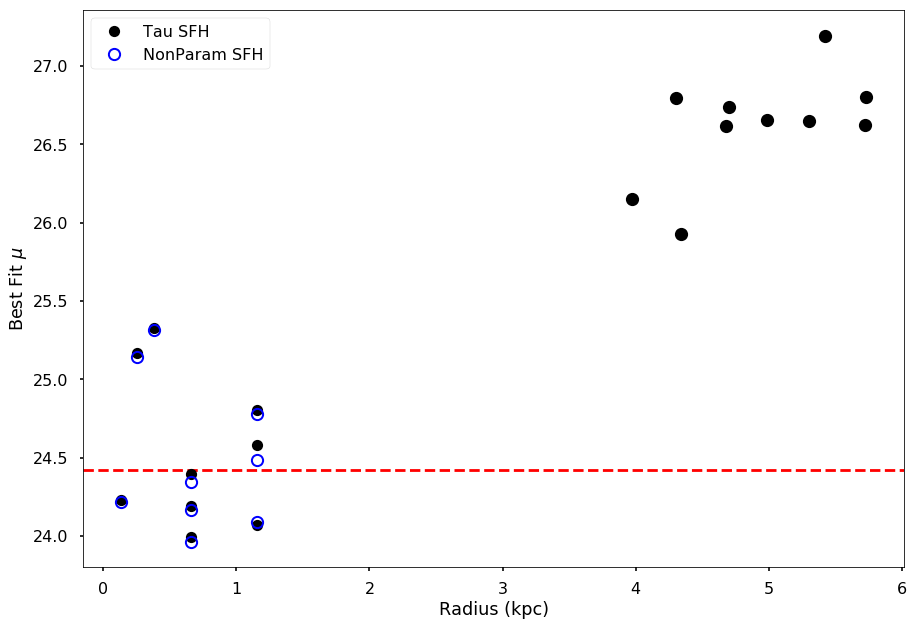

In [134]:
fig, ax = plt.subplots()
ax.plot(bulge_kpc, bulge_dist['model2'], 'ko', label='Tau SFH')
ax.plot(bulge_kpc, bulge_dist['model4'], 'bo', mfc='None', mew=2, label='NonParam SFH')
ax.plot(disk_kpc, disk_dist['model2'], 'ko', mew=2)
plt.legend(loc=0)
plt.axhline(y=24.42, ls='--', color='r', zorder=-1)
plt.xlabel(r'Radius (kpc)')
plt.ylabel(r'Best Fit $\mu$');
plt.tight_layout()


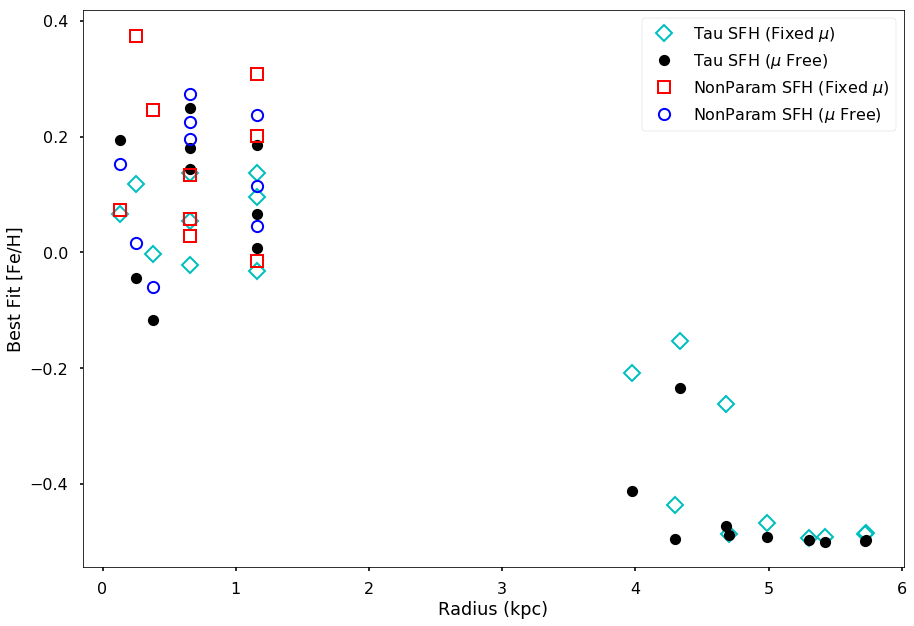

In [136]:
fig, ax = plt.subplots()
ax.plot(bulge_kpc, bulge_feh['model1'], 'cD', mfc='None', mew=2, label=r'Tau SFH (Fixed $\mu$)')
ax.plot(bulge_kpc, bulge_feh['model2'], 'ko', label=r'Tau SFH ($\mu$ Free)')
ax.plot(bulge_kpc, bulge_feh['model3'], 'rs', mfc='None', mew=2, label=r'NonParam SFH (Fixed $\mu$)')
ax.plot(bulge_kpc, bulge_feh['model4'], 'bo', mfc='None', mew=2, label=r'NonParam SFH ($\mu$ Free)')
ax.plot(disk_kpc, disk_feh['model1'], 'cD', mfc='None', mew=2)
ax.plot(disk_kpc, disk_feh['model2'], 'ko')
plt.legend(loc=0)
plt.xlabel(r'Radius (kpc)')
plt.ylabel(r'Best Fit [Fe/H]');
plt.tight_layout()


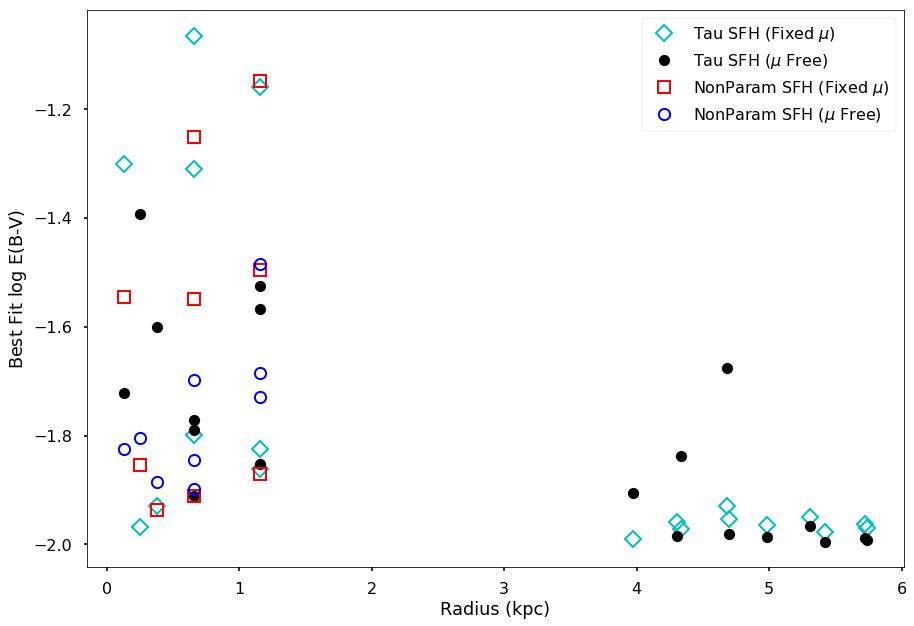

In [137]:
fig, ax = plt.subplots()
ax.plot(bulge_kpc, bulge_dust['model1'], 'cD', mfc='None', mew=2, label=r'Tau SFH (Fixed $\mu$)')
ax.plot(bulge_kpc, bulge_dust['model2'], 'ko', label=r'Tau SFH ($\mu$ Free)')
ax.plot(bulge_kpc, bulge_dust['model3'], 'rs', mfc='None', mew=2, label=r'NonParam SFH (Fixed $\mu$)')
ax.plot(bulge_kpc, bulge_dust['model4'], 'bo', mfc='None', mew=2, label=r'NonParam SFH ($\mu$ Free)')
ax.plot(disk_kpc, disk_dust['model1'], 'cD', mfc='None', mew=2)
ax.plot(disk_kpc, disk_dust['model2'], 'ko')
plt.legend(loc=0)
plt.xlabel(r'Radius (kpc)')
plt.ylabel(r'Best Fit $\log$ E(B-V)');
plt.tight_layout()


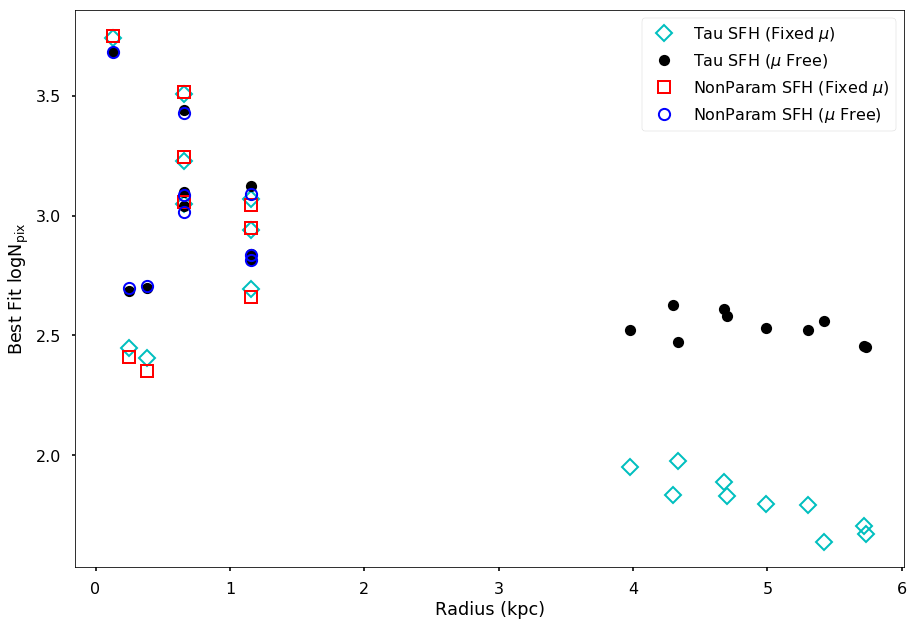

In [138]:
fig, ax = plt.subplots()
ax.plot(bulge_kpc, bulge_Npix['model1'], 'cD', mfc='None', mew=2, label=r'Tau SFH (Fixed $\mu$)')
ax.plot(bulge_kpc, bulge_Npix['model2'], 'ko', label=r'Tau SFH ($\mu$ Free)')
ax.plot(bulge_kpc, bulge_Npix['model3'], 'rs', mfc='None', mew=2, label=r'NonParam SFH (Fixed $\mu$)')
ax.plot(bulge_kpc, bulge_Npix['model4'], 'bo', mfc='None', mew=2, label=r'NonParam SFH ($\mu$ Free)')
ax.plot(disk_kpc, disk_Npix['model1'], 'cD', mfc='None', mew=2)
ax.plot(disk_kpc, disk_Npix['model2'], 'ko')
plt.legend(loc=0)
plt.xlabel(r'Radius (kpc)')
plt.ylabel(r'Best Fit $\log\mathrm{N_{pix}}$')
plt.tight_layout()


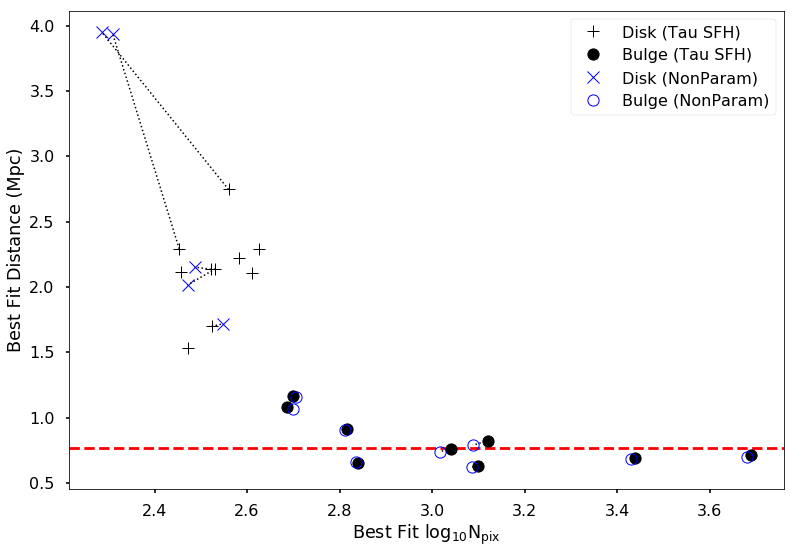

In [15]:
for r in all_regions:
    k = 'model2_'+r
    result = res[k]
    Npix1 = result.best_model.logNpix
    d1 = result.best_model.d_mpc
    if 'disk' in season_to_reg[r]:
        dl2 = plt.plot(Npix1, d1, 'k+', mew=1)
    else:
        bl2 = plt.plot(Npix1, d1, 'ko', mew=1)
    k = 'model4_'+r
    if k not in res:
        continue
    result = res[k]
    Npix2 = result.best_model.logNpix
    d2 = result.best_model.d_mpc
    if 'disk' in season_to_reg[r]:
        dl4 = plt.plot(Npix2, d2, 'bx', mew=1)
    else:
        bl4 = plt.plot(Npix2, d2, 'bo', mfc='None', mew=1)
    plt.plot([Npix1, Npix2], [d1, d2], 'k:', lw=1.5)
plt.legend((dl2[0], bl2[0], dl4[0], bl4[0]), ('Disk (Tau SFH)', 'Bulge (Tau SFH)', 'Disk (NonParam)', 'Bulge (NonParam)'), loc=0)
plt.axhline(y=ppy.distancemodels.dmod_to_mpc(24.42), ls='--', color='r', zorder=-1)
plt.xlabel(r'Best Fit $\log_{10} \mathrm{N}_\mathrm{pix}$')
plt.ylabel(r'Best Fit Distance (Mpc)');
plt.savefig('figures/m31_dist_bias.pdf')

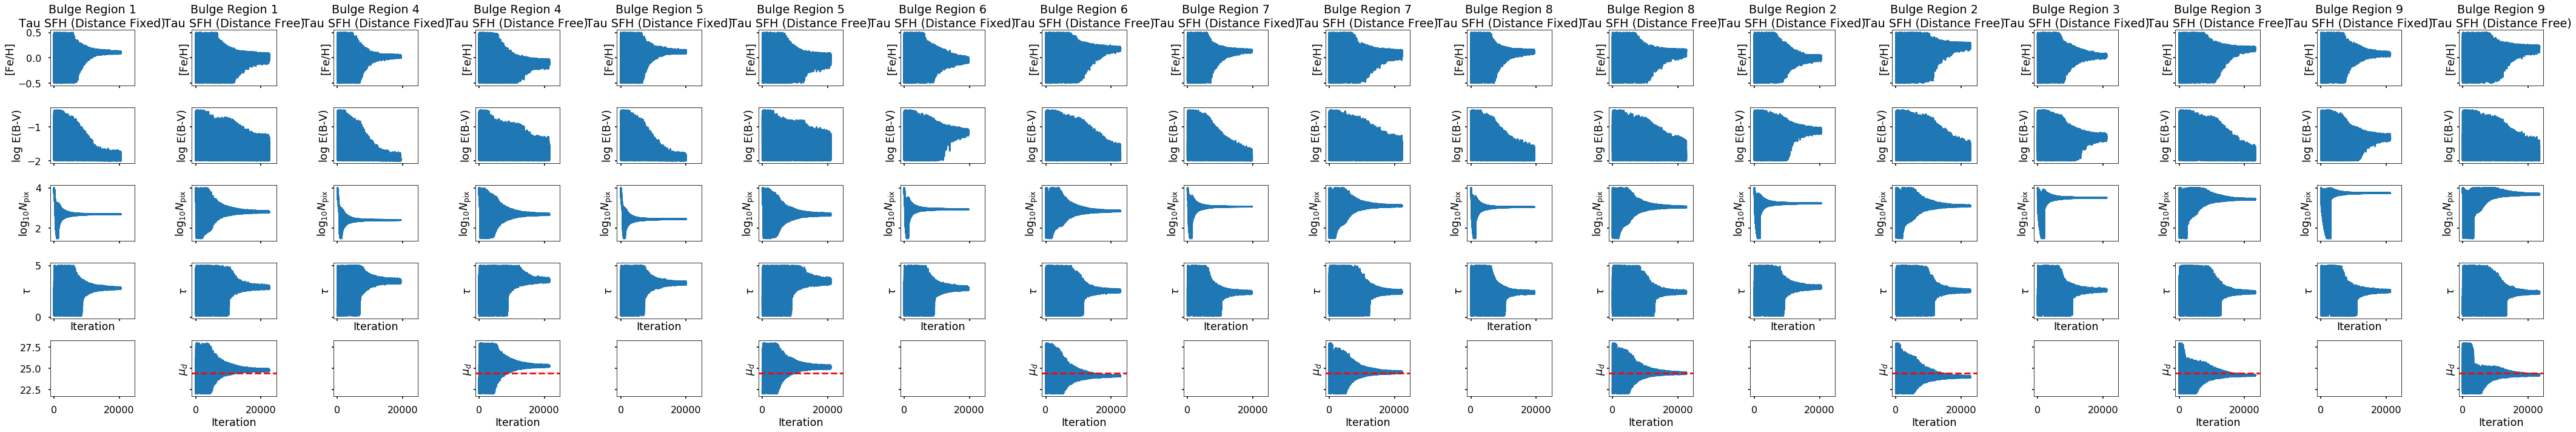

In [20]:
f, a = plot_sets(['model1','model2'], regions=bulge_regions, chains_only=True);

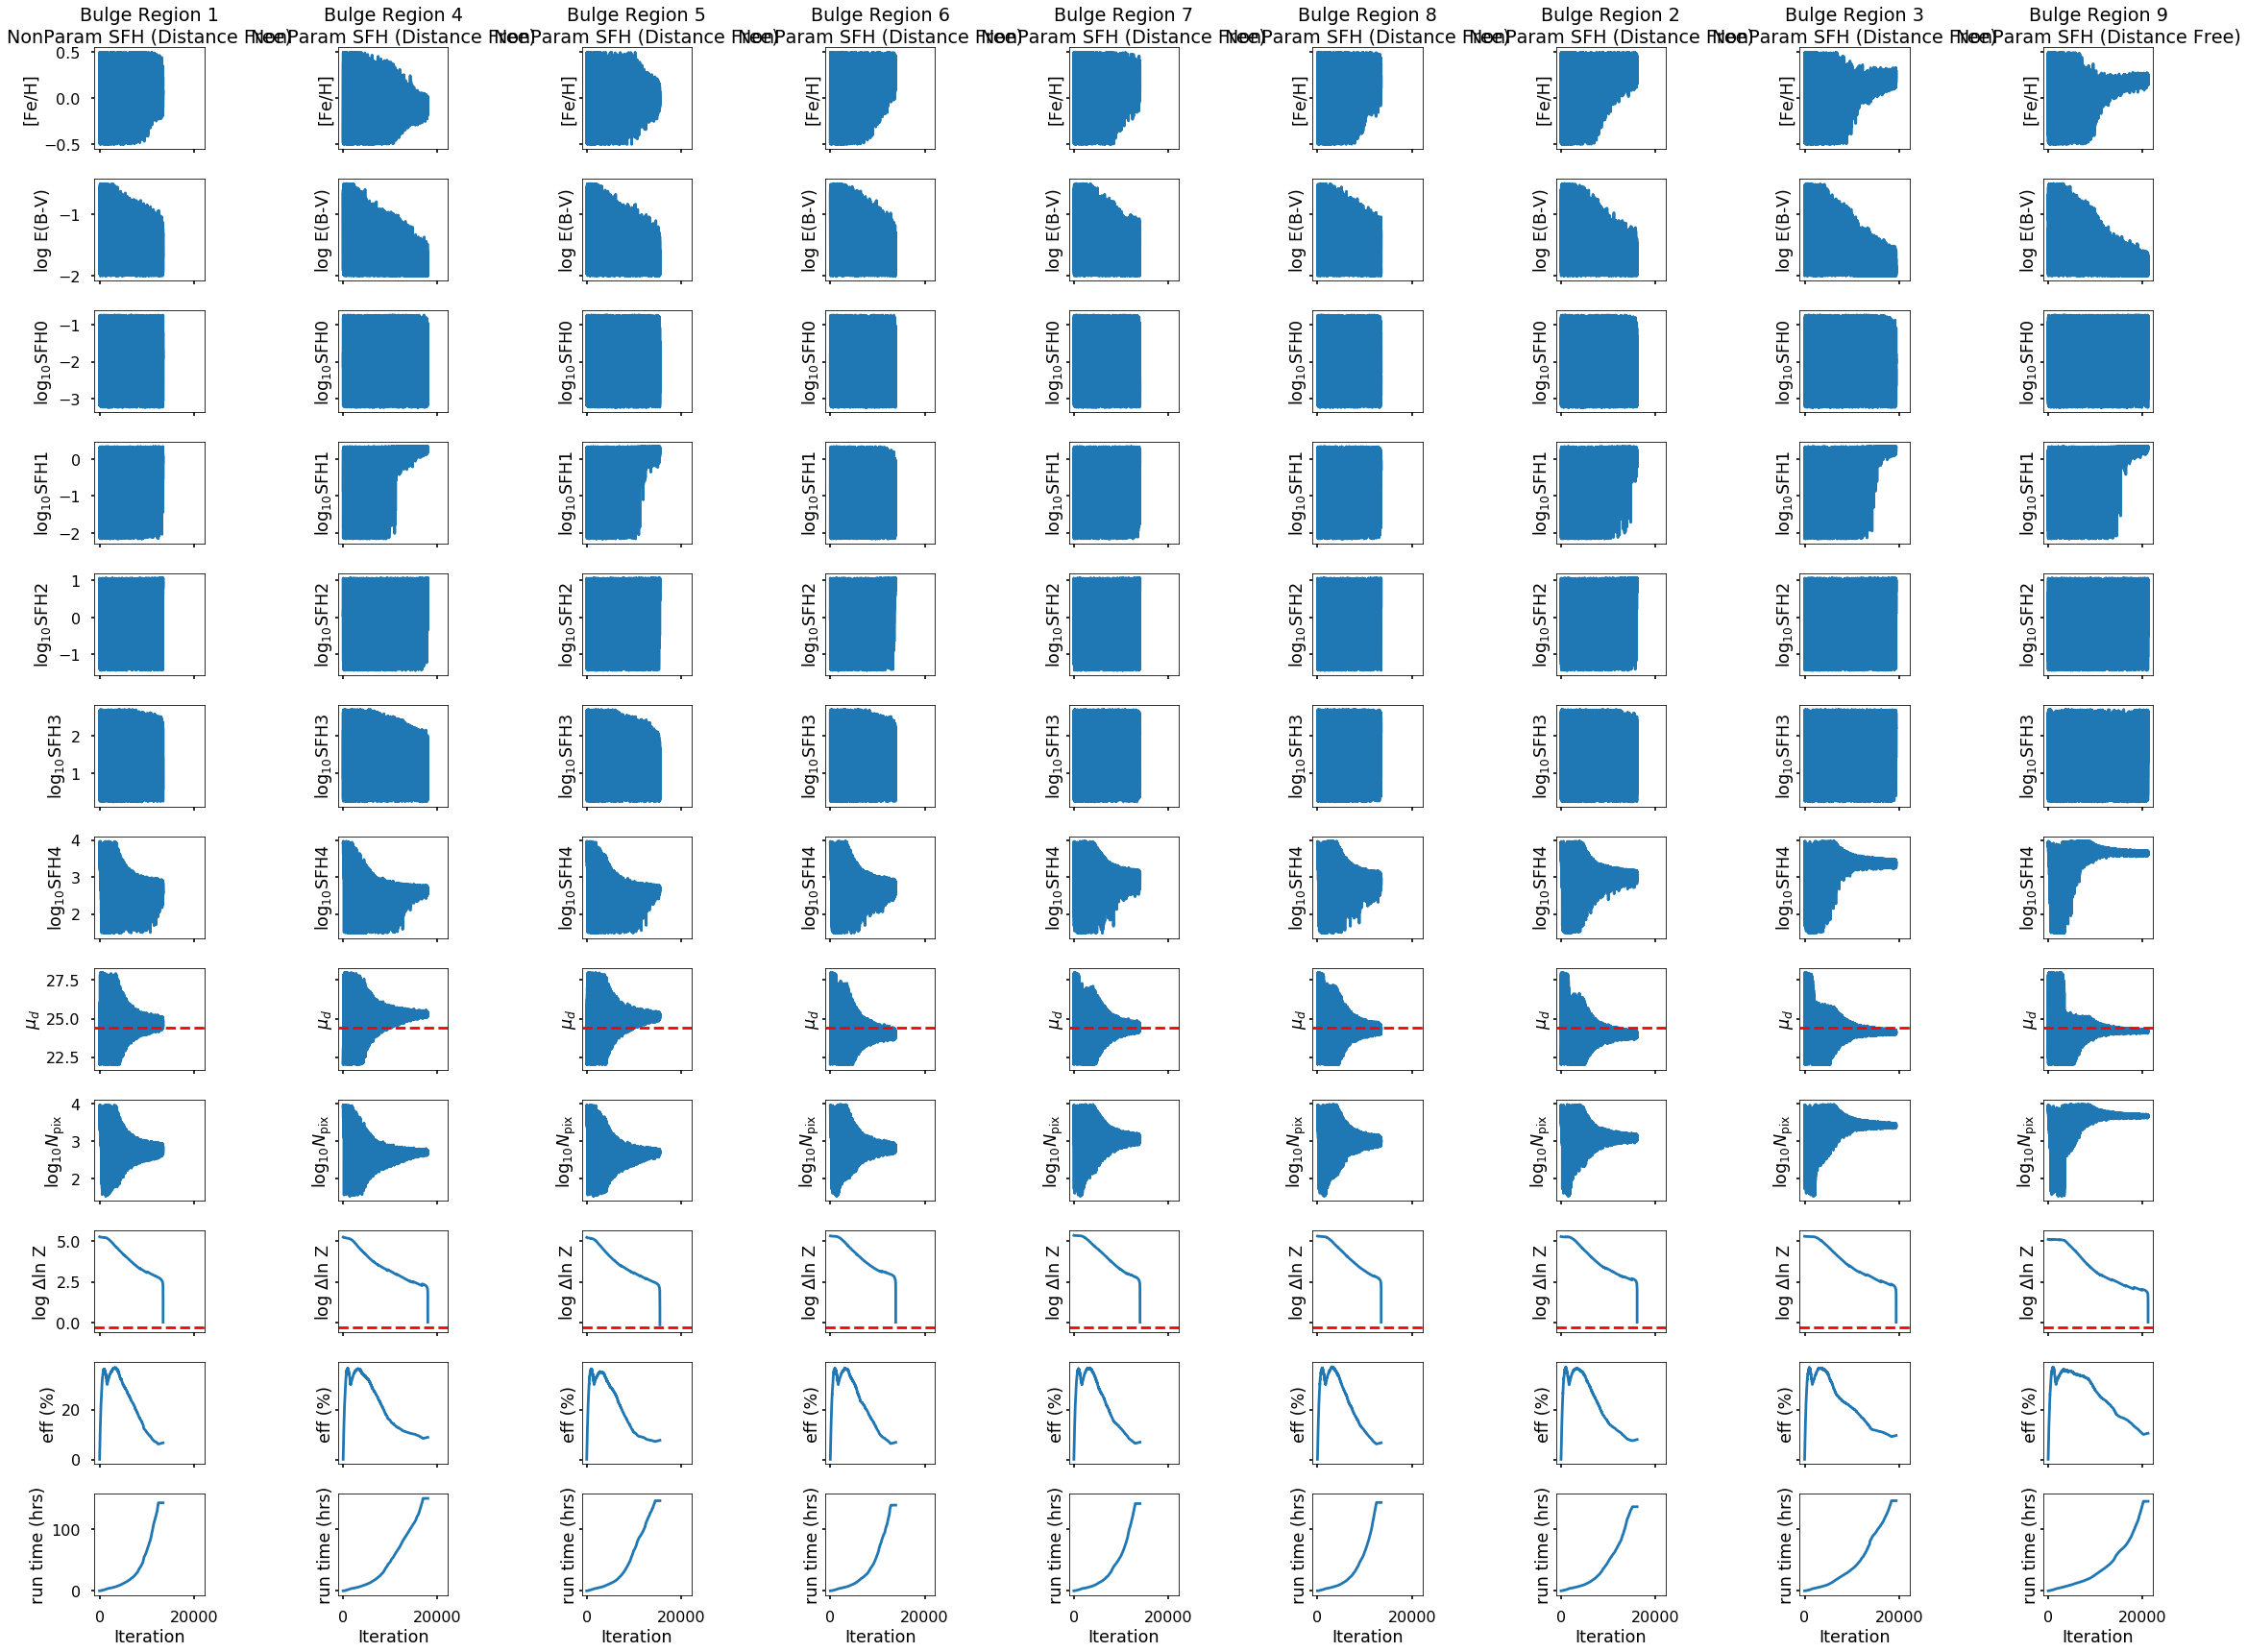

In [21]:
f, a = plot_sets(['model4'], regions=bulge_regions, chains_only=False);

In [ ]:
f, a = plot_sets(['model4'], regions=bulge_regions, chains_only=True);

In [ ]:
f, a = plot_sets(['model2'], regions=disk_regions, chains_only=True);

In [ ]:
plot_sets(['model3'], regions=bulge_regions, chains_only=False);

In [21]:
res['model2_s1'].best_model.Npix

624.4533502805023

In [22]:
res['model2_w1'].best_model.Npix

1234.2410879360523

In [23]:
res['model2_w2'].best_model.Npix

2693.394692610791

In [24]:
res['model3_s1'].best_model.d_mpc

0.9268298233793496

In [25]:
24.42

24.42

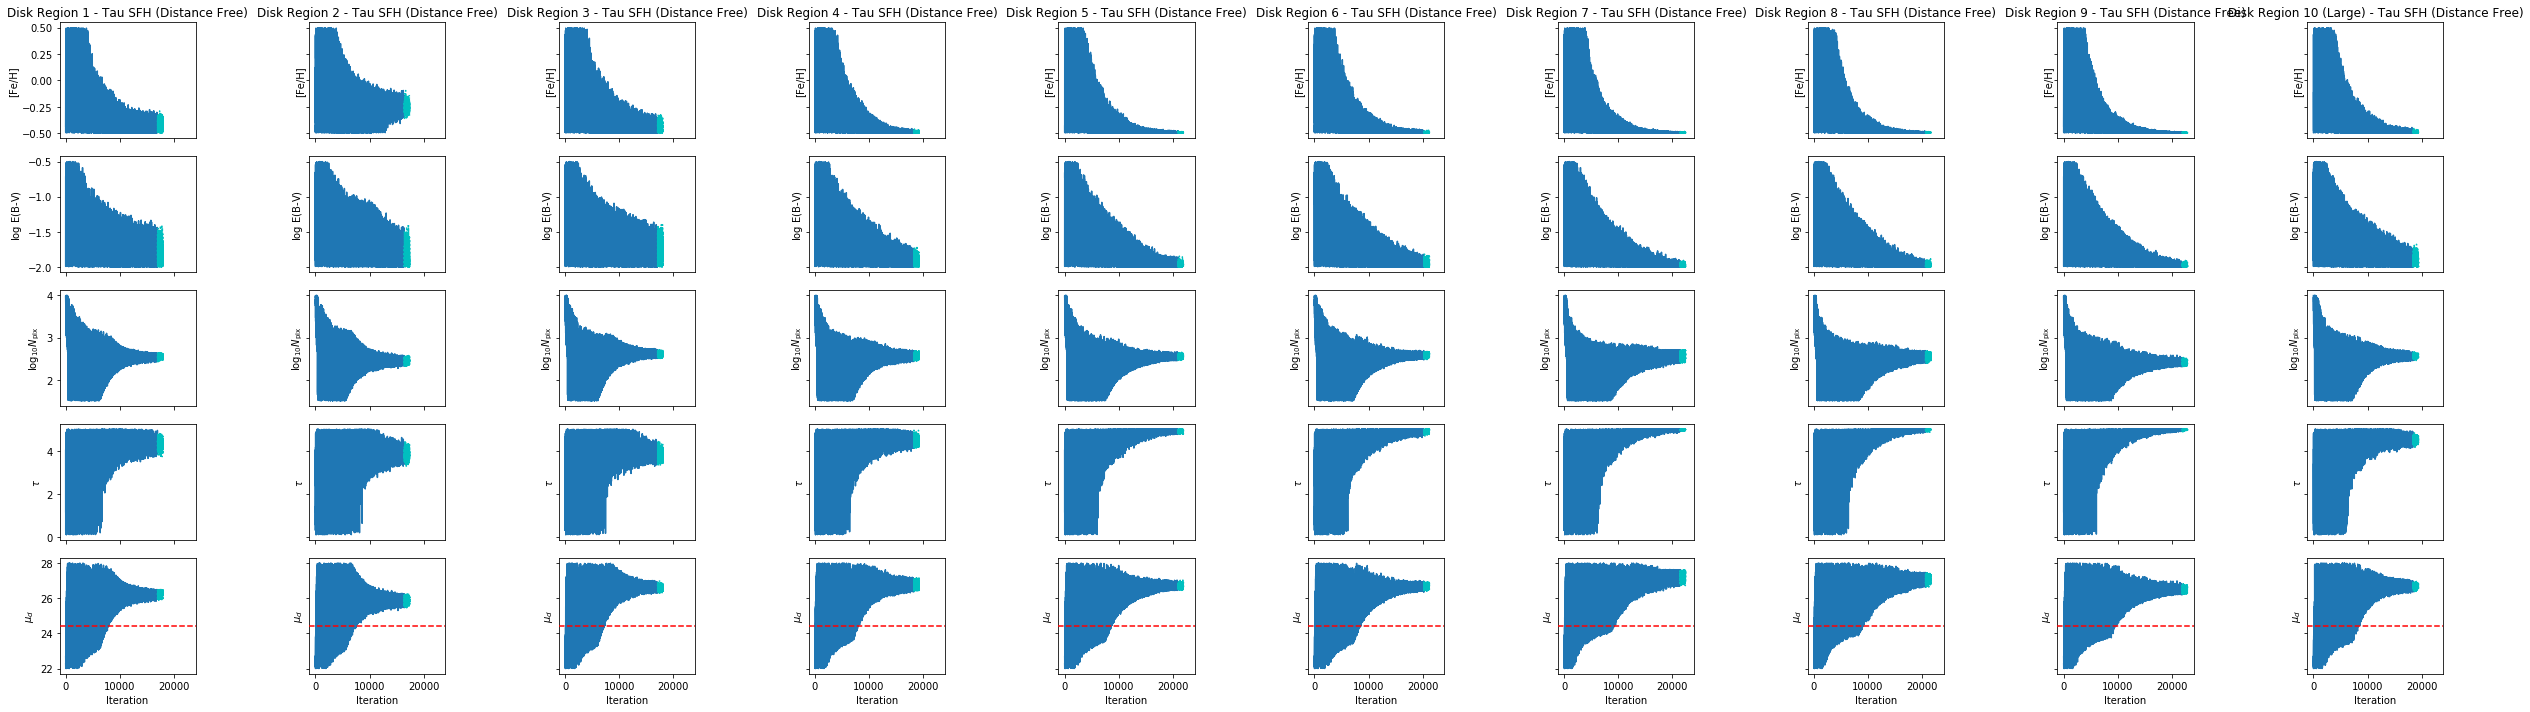

In [26]:
plot_sets(['model2'], regions=disk_regions, chains_only=True);

In [36]:
res['model2_s1'].best_model.Npix / ppy.galaxy.salpeter_meanmass()

702.1169658076134

In [38]:
res['model2_w1'].best_model.Npix / ppy.galaxy.salpeter_meanmass()

1336.009257165502

In [39]:
res['model2_w2'].best_model.Npix / ppy.galaxy.salpeter_meanmass()

2839.288133550427

In [43]:
res['model2_w6'].best_model.Npix / ppy.galaxy.salpeter_meanmass()

382.65682819646895

In [42]:
np.log10(1./ppy.galaxy.salpeter_meanmass())

0.4409094673625564